In [2441]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2442]:
# Loading the train dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Display the first few rows of the datasets and their shape
display("Train", train.head(), train.shape, "Test", test.head(), test.shape)

'Train'

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


(58645, 13)

'Test'

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


(39098, 12)

In [2443]:
train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [2444]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [2445]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106978,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


In [2446]:
# Lignes vides dans le DataFrame `train`
empty_train_rows = train[train.isnull().all(axis=1)]
print(f"Lignes vides dans 'train.csv':\n{empty_train_rows}")

# Lignes vides dans le DataFrame `test`
empty_test_rows = test[test.isnull().all(axis=1)]
print(f"Lignes vides dans 'test.csv':\n{empty_test_rows}")


Lignes vides dans 'train.csv':
Empty DataFrame
Columns: [id, person_age, person_income, person_home_ownership, person_emp_length, loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length, loan_status]
Index: []
Lignes vides dans 'test.csv':
Empty DataFrame
Columns: [id, person_age, person_income, person_home_ownership, person_emp_length, loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length]
Index: []


In [2447]:
# Nombre de lignes vides dans 'train.csv'
num_empty_train_rows = train.isnull().all(axis=1).sum()
print(f"Nombre de lignes vides dans 'train.csv': {num_empty_train_rows}")

# Nombre de lignes vides dans 'test.csv'
num_empty_test_rows = test.isnull().all(axis=1).sum()
print(f"Nombre de lignes vides dans 'test.csv': {num_empty_test_rows}")


Nombre de lignes vides dans 'train.csv': 0
Nombre de lignes vides dans 'test.csv': 0


### EDA

In [2448]:
def plot_continuous(df, column, transform=None):
    # Create subplots for visualizations
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))

    # Original data plots
    sns.histplot(df[column], kde=True, ax=axs[0, 0])
    axs[0, 0].set_title(f'Distribution of {column}')
    axs[0, 0].set_xlabel(column)

    sns.boxplot(y=df[column], ax=axs[1, 0])
    axs[1, 0].set_title(f'Box Plot of {column}')
    axs[1, 0].set_ylabel(column)

    # Transformations (log or square root)
    if transform == 'log':
        transformed_data = np.log1p(df[column])  # log1p handles log(0) gracefully
        transform_label = 'Log'
    elif transform == 'sqrt':
        transformed_data = np.sqrt(df[column])  # Square root transformation
        transform_label = 'Square Root'
    else:
        transformed_data = None  # No transformation if not specified

    # If transformed data exists, generate corresponding plots
    if transformed_data is not None:
        sns.histplot(transformed_data, kde=True, ax=axs[0, 1])
        axs[0, 1].set_title(f'{transform_label} Distribution of {column}')
        axs[0, 1].set_xlabel(f'{transform_label}({column})')

        sns.boxplot(y=transformed_data, ax=axs[1, 1])
        axs[1, 1].set_title(f'{transform_label} Box Plot of {column}')
        axs[1, 1].set_ylabel(f'{transform_label}({column})')
    else:
        # If no transformation, remove the second set of axes
        for ax in [axs[0, 1], axs[1, 1]]:
            ax.remove()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


def plot_categorical(df, column):
    # Create subplots for visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Bar plot showing counts of each category
    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1)
    ax1.set_title(f'Bar Plot of {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Pie chart showing percentage distribution of each category
    ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    ax2.set_title(f'Pie Chart of {column}')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

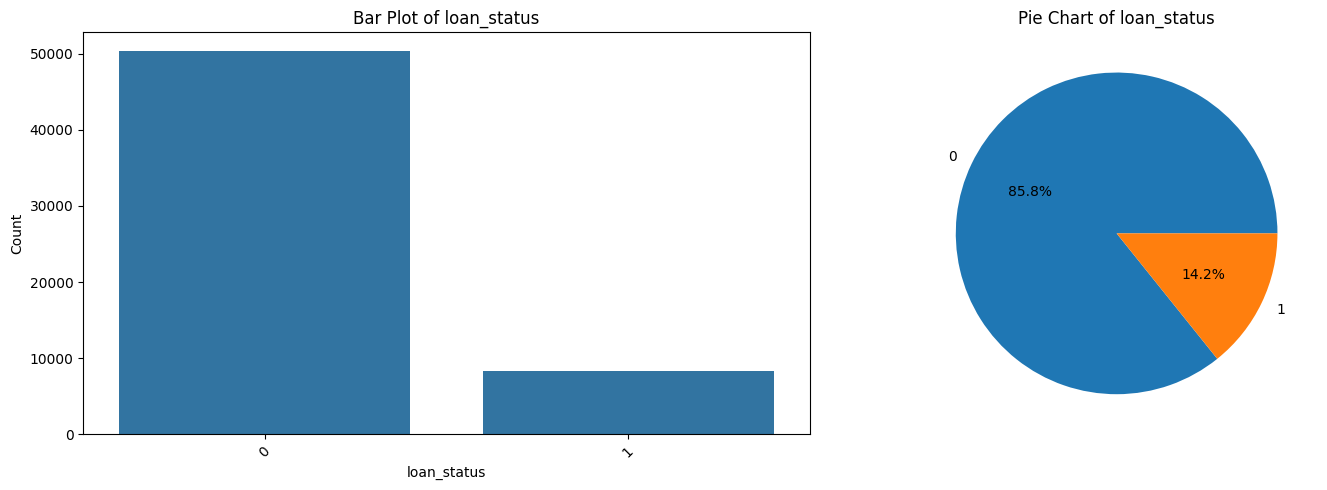

In [2449]:
plot_categorical(train,'loan_status')

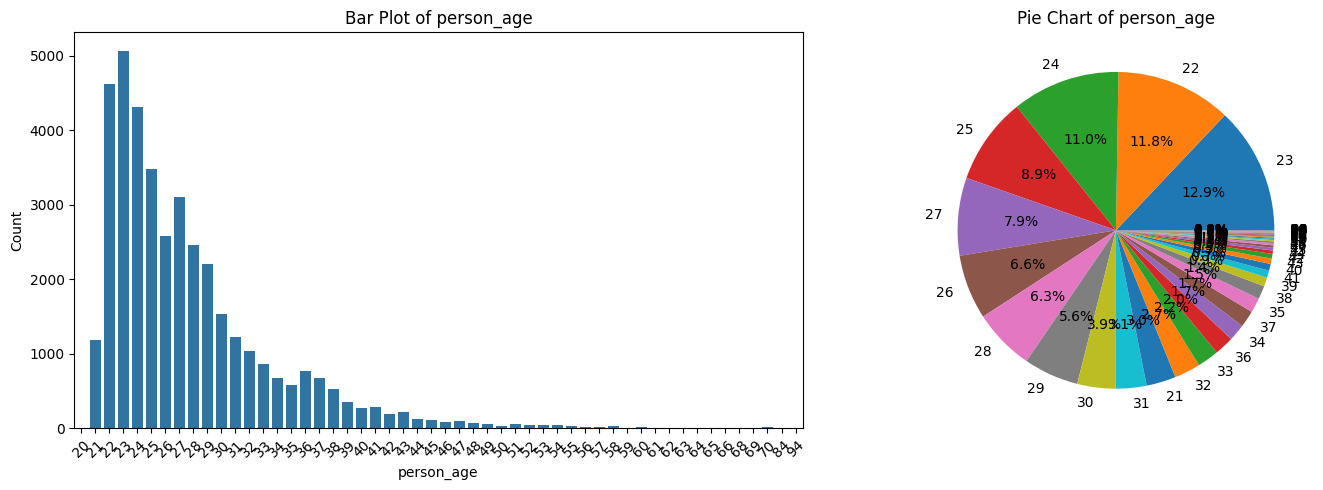

In [2450]:
plot_categorical(test,'person_age')

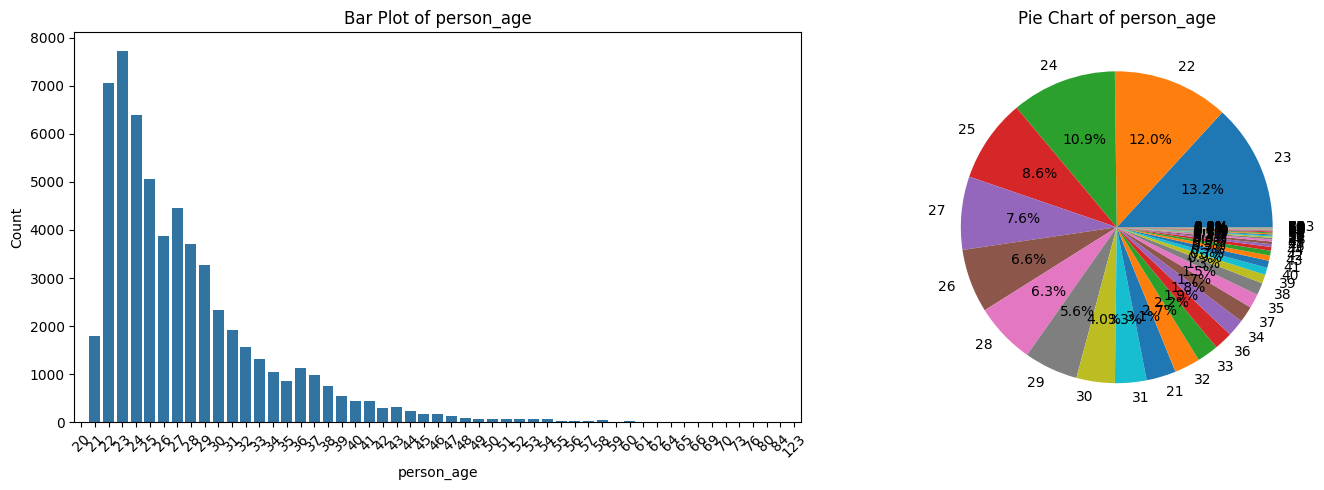

In [2451]:
plot_categorical(train,'person_age')

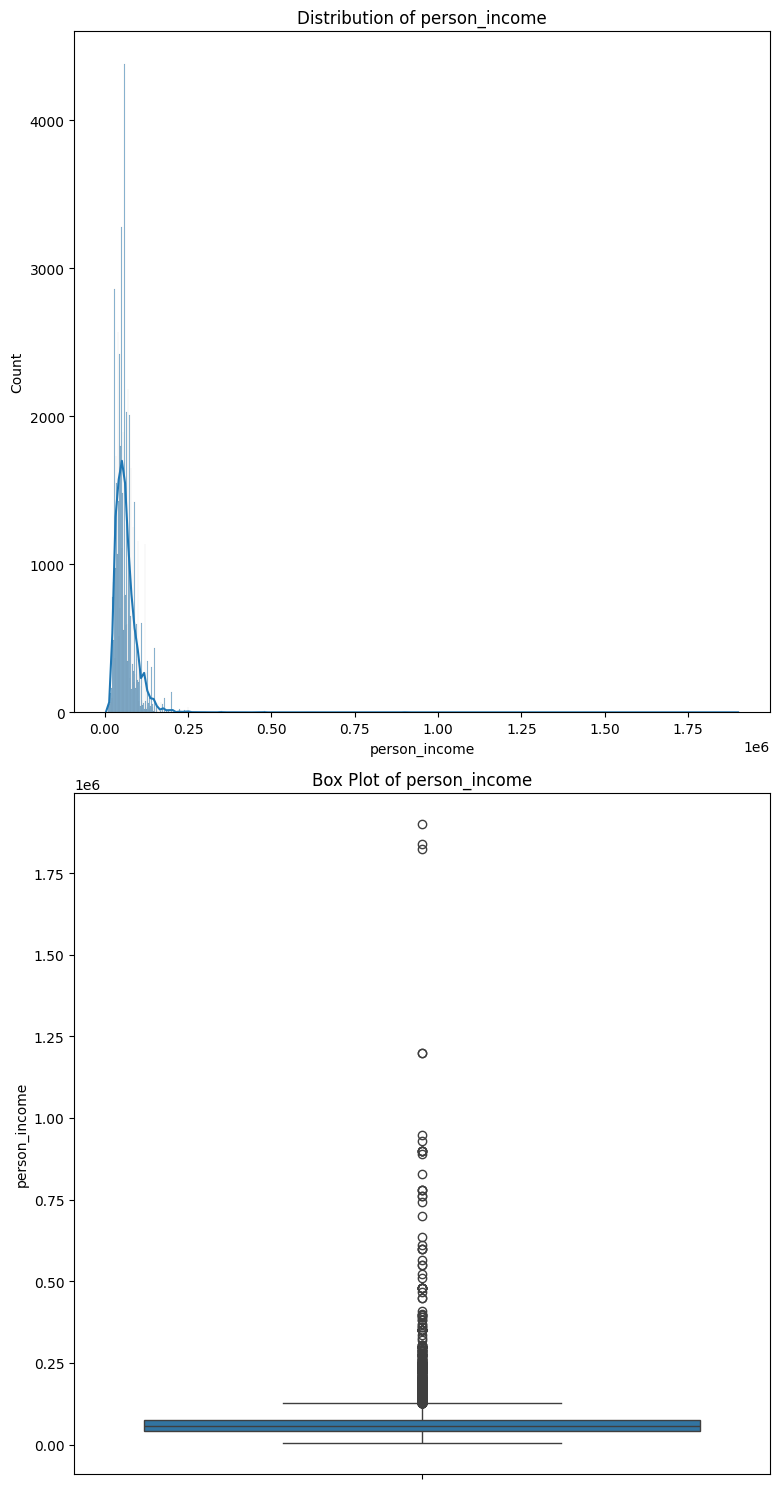

In [2452]:

plot_continuous(train,'person_income')

## numerisation des objets

In [2453]:
def binairyTransform(train, columns):
    for column in columns:
        # Appliquer l'encodage one-hot à chaque colonne spécifique
        df_encoded = pd.get_dummies(train[column], prefix=f'{column}_', prefix_sep='')

        # Convertir les valeurs booléennes en 1 et 0
        df_encoded = df_encoded.astype(int)

        # Ajouter les colonnes binaires générées à train
        train = pd.concat([train, df_encoded], axis=1)

        # Supprimer la colonne d'origine
        train = train.drop(columns=[column])
        
    return train


In [2454]:
def encode(train): 
    train['cb_person_default_on_file'] = train ['cb_person_default_on_file'].map({'N': 1, 'Y': 0})
    return train


In [2455]:
# Colonnes à encoder
columns_to_encode = ['person_home_ownership', 'loan_grade', 'loan_intent']

# Application de la fonction
train = binairyTransform(train, columns_to_encode)
test = binairyTransform(test, columns_to_encode)

train = encode(train)
test = encode(test)

### matrice de correlation

In [2456]:
correlation_matrix = train.corr()

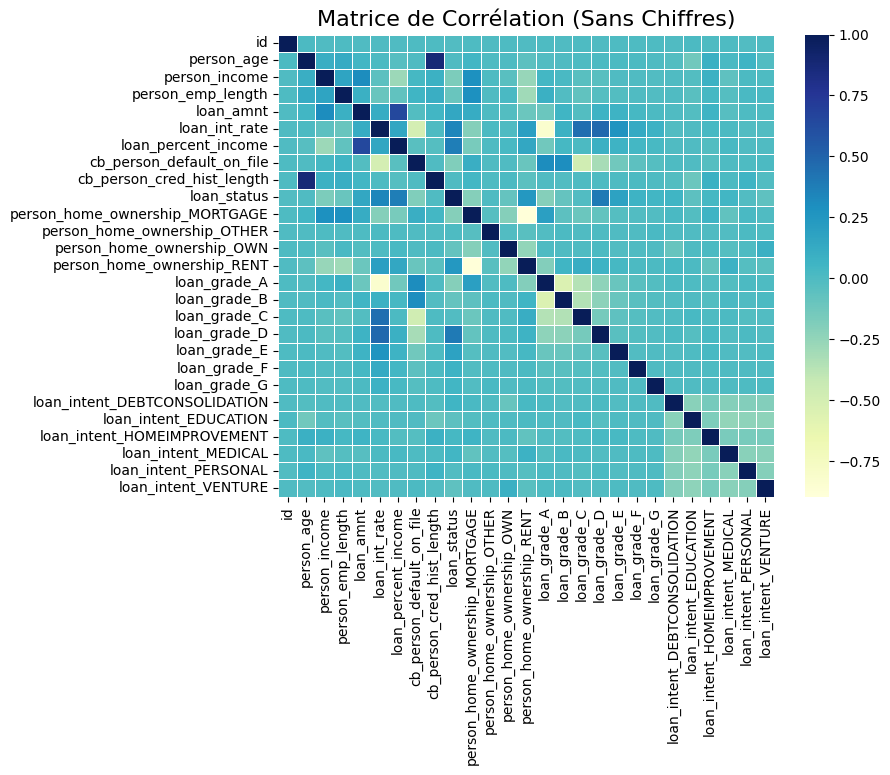

In [2457]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title('Matrice de Corrélation (Sans Chiffres)', fontsize=16)
plt.show()


### preprocessing

In [2458]:
train['income_to_loan_ratio'] = train['person_income'] / train['loan_amnt']
test['income_to_loan_ratio'] = test['person_income'] / test['loan_amnt']

train['age_emp_length_interaction'] = train['person_age'] * train['person_emp_length']
test['age_emp_length_interaction'] = test['person_age'] * test['person_emp_length']



In [2459]:
train

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,...,loan_grade_F,loan_grade_G,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,income_to_loan_ratio,age_emp_length_interaction
0,0,37,35000,0.0,6000,11.49,0.17,1,14,0,...,0,0,0,1,0,0,0,0,5.833333,0.0
1,1,22,56000,6.0,4000,13.35,0.07,1,2,0,...,0,0,0,0,0,1,0,0,14.000000,132.0
2,2,29,28800,8.0,6000,8.90,0.21,1,10,0,...,0,0,0,0,0,0,1,0,4.800000,232.0
3,3,30,70000,14.0,12000,11.11,0.17,1,5,0,...,0,0,0,0,0,0,0,1,5.833333,420.0
4,4,22,60000,2.0,6000,6.92,0.10,1,3,0,...,0,0,0,0,0,1,0,0,10.000000,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,5.0,25000,15.95,0.21,0,10,0,...,0,0,0,1,0,0,0,0,4.800000,170.0
58641,58641,28,28800,0.0,10000,12.73,0.35,1,8,1,...,0,0,0,0,0,1,0,0,2.880000,0.0
58642,58642,23,44000,7.0,6800,16.00,0.15,1,2,1,...,0,0,0,1,0,0,0,0,6.470588,161.0
58643,58643,22,30000,2.0,5000,8.90,0.17,1,3,0,...,0,0,0,1,0,0,0,0,6.000000,44.0


In [2460]:
train['loan_amnt'] = np.log1p(train['loan_amnt'])
test['loan_amnt'] = np.log1p(test['loan_amnt'])
train['person_income'] = np.log1p(train['person_income'])
test['person_income'] = np.log1p(test['person_income'])

date_cols = ['loan_intent_VENTURE','loan_grade_E']
train = train.drop(columns=date_cols)
train = train.drop_duplicates()

test = test.drop(columns=date_cols)
test = test.drop_duplicates()

### model

In [2461]:
# Diviser les données en caractéristiques (X) et cible (y)
X = train.drop(columns=['loan_status'])
y = train['loan_status']

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle XGBoost avec des paramètres optimaux
model = XGBClassifier(
    n_estimators=200,         # Nombre d'arbres
    learning_rate=0.08,        # Taux d'apprentissage
    max_depth=6,              # Profondeur maximale des arbres
    subsample=0.8,            # Fraction des données pour chaque arbre
    gamma=0.04,                # Réduction minimale de la perte requise pour diviser un nœud
    colsample_bytree=0.8,     # Fraction des caractéristiques pour chaque arbre
    random_state=42,
    scale_pos_weight=1, 
    use_label_encoder=False   # Pour éviter les avertissements (versions récentes)
)



# Entraîner le modèle avec évaluation sur validation
model.fit(
    X_train, y_train, 
    eval_set=[(X_val, y_val)],  
    verbose=True
)

# Faire des prédictions sur l'ensemble de validation
val_predictions = model.predict_proba(X_val)[:, 1]  # Probabilité pour la classe 1

# Évaluer la performance (AUC-ROC)
auc_score = roc_auc_score(y_val, val_predictions)
print(f"AUC Score sur les données de validation : {auc_score:.4f}")

# Faire des prédictions sur l'ensemble de test
test_predictions = model.predict_proba(test)[:, 1]  # Probabilités pour la classe 1


[0]	validation_0-logloss:0.37947
[1]	validation_0-logloss:0.35314
[2]	validation_0-logloss:0.33291
[3]	validation_0-logloss:0.31393
[4]	validation_0-logloss:0.29776
[5]	validation_0-logloss:0.28385
[6]	validation_0-logloss:0.27187
[7]	validation_0-logloss:0.26223
[8]	validation_0-logloss:0.25270
[9]	validation_0-logloss:0.24447
[10]	validation_0-logloss:0.23704
[11]	validation_0-logloss:0.23078
[12]	validation_0-logloss:0.22450
[13]	validation_0-logloss:0.21863
[14]	validation_0-logloss:0.21384
[15]	validation_0-logloss:0.20957
[16]	validation_0-logloss:0.20527
[17]	validation_0-logloss:0.20149
[18]	validation_0-logloss:0.19847
[19]	validation_0-logloss:0.19559
[20]	validation_0-logloss:0.19297
[21]	validation_0-logloss:0.19051
[22]	validation_0-logloss:0.18828
[23]	validation_0-logloss:0.18628
[24]	validation_0-logloss:0.18426
[25]	validation_0-logloss:0.18255
[26]	validation_0-logloss:0.18100
[27]	validation_0-logloss:0.17936
[28]	validation_0-logloss:0.17794
[29]	validation_0-loglos

In [2462]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_val, val_predictions)
print(f'AUC-ROC Score : {auc_score}')
submission = pd.DataFrame({'id': test['id'], 'loan_status': test_predictions})
submission.to_csv('submission.csv', index=False)


AUC-ROC Score : 0.9571675871803255
